Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0551 - val_loss: 0.0065
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.3679e-04 - val_loss: 0.0030
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8873e-04 - val_loss: 0.0030
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4821e-04 - val_loss: 0.0023
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.

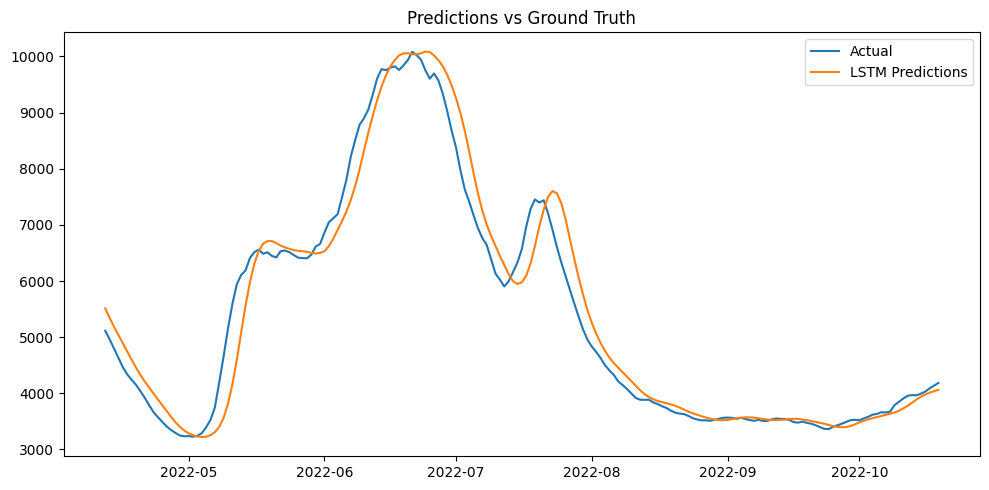

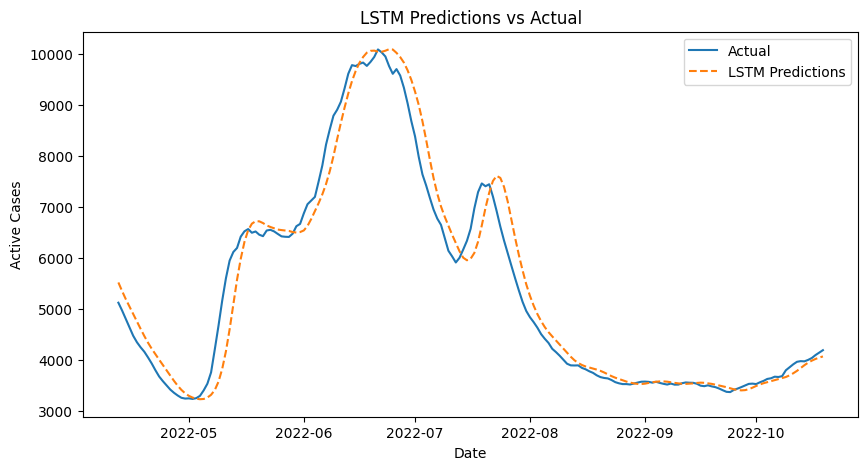

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 5]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
df["CumulativeCases"] = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 10
data = df["CumulativeCases"].values
X, y = create_sequences(data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


predictions = model.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)
r2 = r2_score(y_test_inv, predictions_inv)

print(f"LSTM Metrics:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}")


plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(y_test):], predictions_inv, label="LSTM Predictions", linestyle='--')
plt.title("LSTM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.savefig("LSTM_ActiveCases.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1960 - val_loss: 0.0185
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 7.9444e-04
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0067e-04 - val_loss: 8.3652e-04
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.9831e-05 - val_loss: 1.0653e-04
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.8726e-05 - val_loss: 4.2474e-04
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3266e-05 - val_loss: 1.8406e-04
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3920e-05 - val_loss: 2.3966e-04
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3660e-05 - val_loss: 2.1605e-04
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7438e-05 - val_loss: 3.2212e-04
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8344e-05 - val_loss: 3.5313e-04
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2741e-05 - val_loss: 1.8287e-0

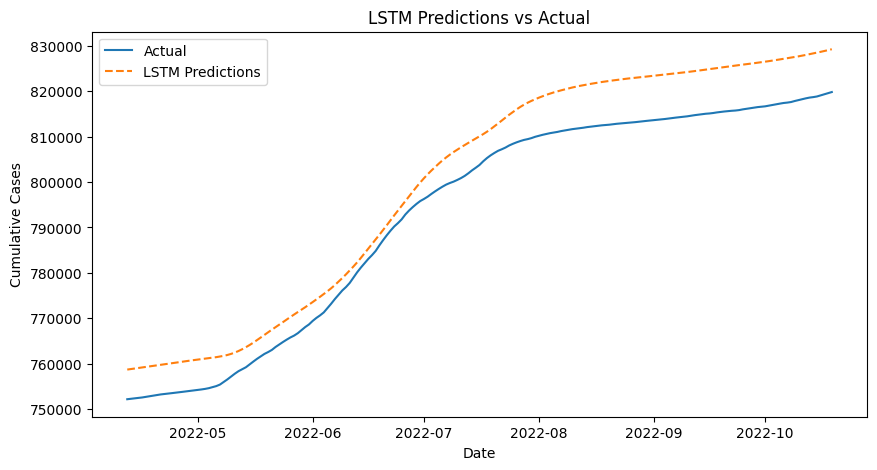

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 2]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
df["CumulativeCases"] = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 10
data = df["CumulativeCases"].values
X, y = create_sequences(data, SEQ_LENGTH)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Step 6: Compile & Train
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


predictions = model.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)
r2 = r2_score(y_test_inv, predictions_inv)

print(f"LSTM Metrics:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}")


plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(y_test):], predictions_inv, label="LSTM Predictions", linestyle='--')
plt.title("LSTM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.savefig("LSTM_CumulativeCases.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3675 - val_loss: 0.0056
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - val_loss: 1.4794e-04
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9122e-05 - val_loss: 8.1919e-05
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9783e-05 - val_loss: 6.4528e-05
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6513e-05 - val_loss: 9.2103e-05
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3119e-05 - val_loss: 3.3894e-05
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0889e-05 - val_loss: 5.0143e-05
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5911e-05 - val_loss: 4.7959e-05
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5415e-05 - val_loss: 2.8349e-05
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4254e-05 - val_loss: 2.0140e-05
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2287e-05 - val_loss: 2.7612e-0

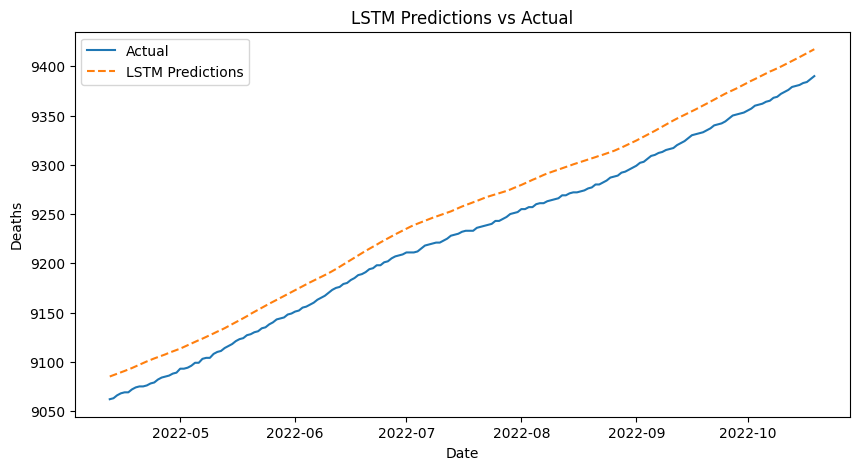

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Step 1: Load Data
df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 3]]  # Select Date & Cumulative Cases
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
df["CumulativeCases"] = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 10
data = df["CumulativeCases"].values
X, y = create_sequences(data, SEQ_LENGTH)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


predictions = model.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)
r2 = r2_score(y_test_inv, predictions_inv)

print(f"LSTM Metrics:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}")


plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(y_test):], predictions_inv, label="LSTM Predictions", linestyle='--')
plt.title("LSTM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.savefig("LSTM_Deaths.pdf", format="pdf", bbox_inches="tight")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2186 - val_loss: 0.0031
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4948e-04 - val_loss: 0.0017
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1525e-04 - val_loss: 7.3580e-04
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.3346e-05 - val_loss: 0.0013
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.4605e-05 - val_loss: 9.7728e-04
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.0734e-05 - val_loss: 0.0019
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.1069e-05 - val_loss: 0.0011
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.2191e-05 - val_loss: 0.0010
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.9413e-05 - val_loss: 3.8015e-04
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.1310e-05 - val_loss: 7.6960e-04
Epoch 12/30
48/48 ━━━━

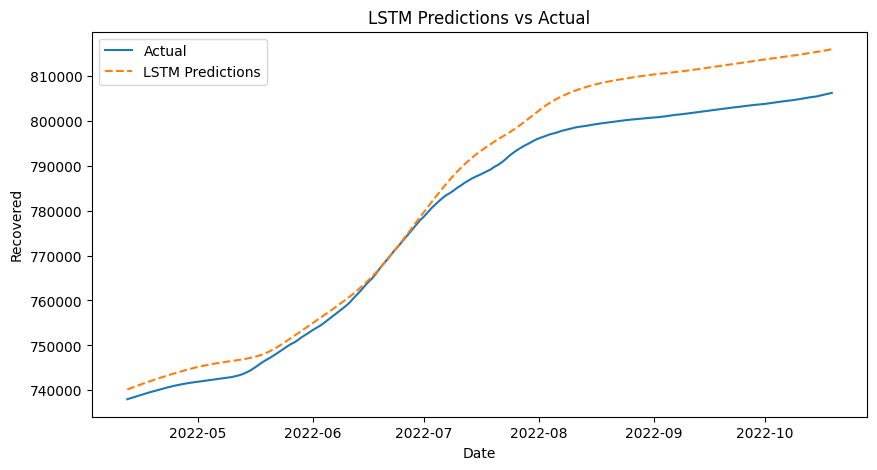

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


df = pd.read_csv("SaudiNov2022data.csv")
df = df.iloc[:, [0, 4]]
df.columns = ["Date", "CumulativeCases"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
df["CumulativeCases"] = scaler.fit_transform(df[["CumulativeCases"]])


def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 10
data = df["CumulativeCases"].values
X, y = create_sequences(data, SEQ_LENGTH)



split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


predictions = model.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)


mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)
r2 = r2_score(y_test_inv, predictions_inv)

print(f"LSTM Metrics:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}")

plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(y_test):], predictions_inv, label="LSTM Predictions", linestyle='--')
plt.title("LSTM Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Recovered")
plt.legend()
plt.savefig("LSTM_Recovered.pdf", format="pdf", bbox_inches="tight")
plt.show()